In [425]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import matplotlib.dates as mdates
from matplotlib import pyplot 
import seaborn as sns

In [426]:
df_cons = pd.read_csv("D:/Data Science MsC/IHU/MsC Thesis\ITI\Smart home measurements/Load_Consumption_Measurements_03.10.2018_30.09.2020.csv")
df_cons['new2_Timestamp_UTC']=pd.to_datetime(df_cons['Timestamp_UTC']).dt.tz_localize(None)
df_cons['new_Timestamp_UTC']=df_cons['new2_Timestamp_UTC'].dt.round('15min') 
df_cons

,Timestamp_UTC,Energy_Consumption,new2_Timestamp_UTC,new_Timestamp_UTC
0,2018-10-03T21:00:00Z,0.8,2018-10-03 21:00:00,2018-10-03 21:00:00
1,2018-10-03T21:15:00Z,0.7,2018-10-03 21:15:00,2018-10-03 21:15:00
2,2018-10-03T21:30:00Z,0.7,2018-10-03 21:30:00,2018-10-03 21:30:00
3,2018-10-03T21:45:00Z,0.7,2018-10-03 21:45:00,2018-10-03 21:45:00
4,2018-10-03T22:00:00Z,0.6,2018-10-03 22:00:00,2018-10-03 22:00:00
...,...,...,...,...
63179,2020-09-30T19:45:00Z,0.5,2020-09-30 19:45:00,2020-09-30 19:45:00
63180,2020-09-30T20:00:00Z,0.5,2020-09-30 20:00:00,2020-09-30 20:00:00
63181,2020-09-30T20:15:00Z,0.5,2020-09-30 20:15:00,2020-09-30 20:15:00
63182,2020-09-30T20:30:00Z,0.5,2020-09-30 20:30:00,2020-09-30 20:30:00


In [427]:
df_cons.loc[df_cons["new_Timestamp_UTC"]!= df_cons["new2_Timestamp_UTC"] ]

,Timestamp_UTC,Energy_Consumption,new2_Timestamp_UTC,new_Timestamp_UTC
1538,2018-10-20T17:54:20Z,0.7,2018-10-20 17:54:20,2018-10-20 18:00:00
1559,2018-10-20T23:30:55Z,0.2,2018-10-20 23:30:55,2018-10-20 23:30:00
1578,2018-10-21T04:15:55Z,0.2,2018-10-21 04:15:55,2018-10-21 04:15:00
1608,2018-10-21T11:45:55Z,0.2,2018-10-21 11:45:55,2018-10-21 11:45:00
3763,2018-11-13T15:00:34Z,0.8,2018-11-13 15:00:34,2018-11-13 15:00:00
...,...,...,...,...
23299,2019-06-16T19:46:00Z,0.3,2019-06-16 19:46:00,2019-06-16 19:45:00
23300,2019-06-16T20:02:00Z,0.3,2019-06-16 20:02:00,2019-06-16 20:00:00
53840,2020-06-10T19:14:00Z,0.5,2020-06-10 19:14:00,2020-06-10 19:15:00
53896,2020-06-11T12:29:00Z,0.7,2020-06-11 12:29:00,2020-06-11 12:30:00


In [428]:
df_we = pd.read_csv("D:/Data Science MsC/IHU/MsC Thesis\ITI\Smart home measurements/Weather_Measurements_03.10.2018_30.09.2020.csv")
df_we['new2_Timestamp_UTC']=pd.to_datetime(df_we['Timestamp_UTC']).dt.tz_localize(None)
df_we['new_Timestamp_UTC']=df_we['new2_Timestamp_UTC'].dt.round('15min')  
df_we

,Timestamp_UTC,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Clouds_low,Clouds_mid,Clouds_high,Temperature_v2,Unnamed: 9,Relative_Humidity_v2,Wind_Speed_v2,new2_Timestamp_UTC,new_Timestamp_UTC
0,2018-10-03T21:00:00Z,20.6,74.0,3.60,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03 21:00:00,2018-10-03 21:00:00
1,2018-10-03T21:15:00Z,20.6,74.0,3.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03 21:15:00,2018-10-03 21:15:00
2,2018-10-03T21:30:00Z,20.6,74.0,3.60,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03 21:30:00,2018-10-03 21:30:00
3,2018-10-03T21:45:00Z,20.6,70.0,3.60,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03 21:45:00,2018-10-03 21:45:00
4,2018-10-03T22:00:00Z,22.2,32.0,5.40,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03 22:00:00,2018-10-03 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64902,2020-09-30T19:45:00Z,18.9,48.0,1.34,100.0,NaN,NaN,NaN,18.59,35.0,0.46,2.98,2020-09-30 19:45:00,2020-09-30 19:45:00
64903,2020-09-30T20:00:00Z,18.9,48.0,1.34,100.0,NaN,NaN,NaN,18.44,35.0,0.46,2.81,2020-09-30 20:00:00,2020-09-30 20:00:00
64904,2020-09-30T20:15:00Z,18.3,50.0,0.45,0.0,NaN,NaN,NaN,18.30,34.0,0.46,2.65,2020-09-30 20:15:00,2020-09-30 20:15:00
64905,2020-09-30T20:30:00Z,18.3,50.0,0.45,0.0,NaN,NaN,NaN,18.17,32.0,0.47,2.50,2020-09-30 20:30:00,2020-09-30 20:30:00


In [429]:
df_PV = pd.read_csv("D:/Data Science MsC/IHU/MsC Thesis\ITI\Smart home measurements/PV_Generation_Measurements_03.10.2018_30.09.2020.csv")
df_PV

,Timestamp_UTC,Energy_Generation
0,2018-10-03T21:00:00Z,0.0
1,2018-10-03T21:15:00Z,0.0
2,2018-10-03T21:30:00Z,0.0
3,2018-10-03T21:45:00Z,0.0
4,2018-10-03T22:00:00Z,0.0
...,...,...
66478,2020-09-30T19:45:00Z,0.0
66479,2020-09-30T20:00:00Z,0.0
66480,2020-09-30T20:15:00Z,0.0
66481,2020-09-30T20:30:00Z,0.0


In [430]:
df_PV['new2_Timestamp_UTC']=pd.to_datetime(df_PV['Timestamp_UTC']).dt.tz_localize(None)
df_PV['new_Timestamp_UTC']=df_PV['new2_Timestamp_UTC'].dt.round('15min')  
df_PV

,Timestamp_UTC,Energy_Generation,new2_Timestamp_UTC,new_Timestamp_UTC
0,2018-10-03T21:00:00Z,0.0,2018-10-03 21:00:00,2018-10-03 21:00:00
1,2018-10-03T21:15:00Z,0.0,2018-10-03 21:15:00,2018-10-03 21:15:00
2,2018-10-03T21:30:00Z,0.0,2018-10-03 21:30:00,2018-10-03 21:30:00
3,2018-10-03T21:45:00Z,0.0,2018-10-03 21:45:00,2018-10-03 21:45:00
4,2018-10-03T22:00:00Z,0.0,2018-10-03 22:00:00,2018-10-03 22:00:00
...,...,...,...,...
66478,2020-09-30T19:45:00Z,0.0,2020-09-30 19:45:00,2020-09-30 19:45:00
66479,2020-09-30T20:00:00Z,0.0,2020-09-30 20:00:00,2020-09-30 20:00:00
66480,2020-09-30T20:15:00Z,0.0,2020-09-30 20:15:00,2020-09-30 20:15:00
66481,2020-09-30T20:30:00Z,0.0,2020-09-30 20:30:00,2020-09-30 20:30:00


In [431]:
df_PV.loc[df_PV["new_Timestamp_UTC"]!= df_PV["new2_Timestamp_UTC"] ]

,Timestamp_UTC,Energy_Generation,new2_Timestamp_UTC,new_Timestamp_UTC
1420,2018-10-19T09:27:00Z,0.055000,2018-10-19 09:27:00.000,2018-10-19 09:30:00
1421,2018-10-19T09:28:00Z,0.058000,2018-10-19 09:28:00.000,2018-10-19 09:30:00
1422,2018-10-19T09:29:00Z,0.058001,2018-10-19 09:29:00.000,2018-10-19 09:30:00
1424,2018-10-19T09:31:00Z,0.058001,2018-10-19 09:31:00.000,2018-10-19 09:30:00
1425,2018-10-19T09:32:00Z,0.058000,2018-10-19 09:32:00.000,2018-10-19 09:30:00
...,...,...,...,...
1559,2018-10-19T13:06:37.132Z,0.865999,2018-10-19 13:06:37.132,2018-10-19 13:00:00
1560,2018-10-19T14:00:50.434Z,0.589750,2018-10-19 14:00:50.434,2018-10-19 14:00:00
1561,2018-10-19T14:15:50.454Z,0.000000,2018-10-19 14:15:50.454,2018-10-19 14:15:00
1562,2018-10-19T14:29:00Z,0.488250,2018-10-19 14:29:00.000,2018-10-19 14:30:00


In [432]:
df=pd.merge(df_cons, df_PV, on='new_Timestamp_UTC',  how='left')
df_cons_PV=df[['new_Timestamp_UTC','Energy_Consumption','Energy_Generation']]
df_cons_PV

,new_Timestamp_UTC,Energy_Consumption,Energy_Generation
0,2018-10-03 21:00:00,0.8,0.0
1,2018-10-03 21:15:00,0.7,0.0
2,2018-10-03 21:30:00,0.7,0.0
3,2018-10-03 21:45:00,0.7,0.0
4,2018-10-03 22:00:00,0.6,0.0
...,...,...,...
63304,2020-09-30 19:45:00,0.5,0.0
63305,2020-09-30 20:00:00,0.5,0.0
63306,2020-09-30 20:15:00,0.5,0.0
63307,2020-09-30 20:30:00,0.5,0.0


In [433]:
tdi = pd.DatetimeIndex(df_cons_PV.new_Timestamp_UTC)
df_cons_PV.set_index(tdi, inplace=True)
df_cons_PV.index.name = 'new_Timestamp_UTC'

In [434]:
df_cons_PV['Energy_Generation']=df_cons_PV['Energy_Generation'].interpolate(method="time")
df_cons_PV

C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\4262338174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons_PV['Energy_Generation']=df_cons_PV['Energy_Generation'].interpolate(method="time")


,new_Timestamp_UTC,Energy_Consumption,Energy_Generation
new_Timestamp_UTC,,,
2018-10-03 21:00:00,2018-10-03 21:00:00,0.8,0.0
2018-10-03 21:15:00,2018-10-03 21:15:00,0.7,0.0
2018-10-03 21:30:00,2018-10-03 21:30:00,0.7,0.0
2018-10-03 21:45:00,2018-10-03 21:45:00,0.7,0.0
2018-10-03 22:00:00,2018-10-03 22:00:00,0.6,0.0
...,...,...,...
2020-09-30 19:45:00,2020-09-30 19:45:00,0.5,0.0
2020-09-30 20:00:00,2020-09-30 20:00:00,0.5,0.0
2020-09-30 20:15:00,2020-09-30 20:15:00,0.5,0.0


In [435]:
df_cons_PV[df_cons_PV.isna().any(axis=1)]
del df_cons_PV['new_Timestamp_UTC']
df_cons_PV.reset_index(inplace=True);df_cons_PV
df_cons_PV

,new_Timestamp_UTC,Energy_Consumption,Energy_Generation
0,2018-10-03 21:00:00,0.8,0.0
1,2018-10-03 21:15:00,0.7,0.0
2,2018-10-03 21:30:00,0.7,0.0
3,2018-10-03 21:45:00,0.7,0.0
4,2018-10-03 22:00:00,0.6,0.0
...,...,...,...
63304,2020-09-30 19:45:00,0.5,0.0
63305,2020-09-30 20:00:00,0.5,0.0
63306,2020-09-30 20:15:00,0.5,0.0
63307,2020-09-30 20:30:00,0.5,0.0


In [436]:
df=pd.merge(df_cons_PV, df_we, on='new_Timestamp_UTC',  how='left')
df_cons_we=df[['new_Timestamp_UTC','Energy_Consumption','Energy_Generation','Temperature_v1', 'Relative_Humidity_v1','Wind_Speed_v1','Clouds_v1']]
df_cons_we

,new_Timestamp_UTC,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1
0,2018-10-03 21:00:00,0.8,0.0,20.6,74.0,3.60,25.0
1,2018-10-03 21:15:00,0.7,0.0,20.6,74.0,3.60,0.0
2,2018-10-03 21:30:00,0.7,0.0,20.6,74.0,3.60,25.0
3,2018-10-03 21:45:00,0.7,0.0,20.6,70.0,3.60,25.0
4,2018-10-03 22:00:00,0.6,0.0,22.2,32.0,5.40,25.0
...,...,...,...,...,...,...,...
63354,2020-09-30 19:45:00,0.5,0.0,18.9,48.0,1.34,100.0
63355,2020-09-30 20:00:00,0.5,0.0,18.9,48.0,1.34,100.0
63356,2020-09-30 20:15:00,0.5,0.0,18.3,50.0,0.45,0.0
63357,2020-09-30 20:30:00,0.5,0.0,18.3,50.0,0.45,0.0


In [437]:
df_cons_we[df_cons_we.isna().any(axis=1)]

,new_Timestamp_UTC,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1
643,2018-10-11 07:15:00,1.1,0.820059,NaN,NaN,NaN,NaN
3775,2018-11-12 10:30:00,0.8,0.000000,NaN,NaN,NaN,NaN
3776,2018-11-12 10:45:00,0.9,0.000000,NaN,NaN,NaN,NaN
3778,2018-11-12 11:15:00,0.7,0.000000,NaN,NaN,NaN,NaN
3779,2018-11-12 11:30:00,0.7,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
61311,2020-09-09 09:45:00,2.1,1.727000,NaN,NaN,NaN,NaN
62635,2020-09-23 08:00:00,1.2,1.137500,NaN,NaN,NaN,NaN
62879,2020-09-25 21:00:00,1.1,0.000000,NaN,NaN,NaN,NaN
62880,2020-09-25 21:15:00,1.1,0.000000,NaN,NaN,NaN,NaN


set([x for x in df_cons_we['new_Timestamp_UTC'] if df_cons_we['new_Timestamp_UTC'].count(x) > 1])

In [438]:
df_cons_we['datetime'] = pd.to_datetime(df_cons_we['new_Timestamp_UTC'])
df_cons_we

C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\1965713507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons_we['datetime'] = pd.to_datetime(df_cons_we['new_Timestamp_UTC'])


,new_Timestamp_UTC,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,datetime
0,2018-10-03 21:00:00,0.8,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:00:00
1,2018-10-03 21:15:00,0.7,0.0,20.6,74.0,3.60,0.0,2018-10-03 21:15:00
2,2018-10-03 21:30:00,0.7,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:30:00
3,2018-10-03 21:45:00,0.7,0.0,20.6,70.0,3.60,25.0,2018-10-03 21:45:00
4,2018-10-03 22:00:00,0.6,0.0,22.2,32.0,5.40,25.0,2018-10-03 22:00:00
...,...,...,...,...,...,...,...,...
63354,2020-09-30 19:45:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 19:45:00
63355,2020-09-30 20:00:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 20:00:00
63356,2020-09-30 20:15:00,0.5,0.0,18.3,50.0,0.45,0.0,2020-09-30 20:15:00
63357,2020-09-30 20:30:00,0.5,0.0,18.3,50.0,0.45,0.0,2020-09-30 20:30:00


In [439]:
tdi = pd.DatetimeIndex(df_cons_we.new_Timestamp_UTC)
df_cons_we.set_index(tdi, inplace=True)
df_cons_we.index.name = 'new_Timestamp_UTC'

In [440]:
df_cons_we

,new_Timestamp_UTC,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,datetime
new_Timestamp_UTC,,,,,,,,
2018-10-03 21:00:00,2018-10-03 21:00:00,0.8,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:00:00
2018-10-03 21:15:00,2018-10-03 21:15:00,0.7,0.0,20.6,74.0,3.60,0.0,2018-10-03 21:15:00
2018-10-03 21:30:00,2018-10-03 21:30:00,0.7,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:30:00
2018-10-03 21:45:00,2018-10-03 21:45:00,0.7,0.0,20.6,70.0,3.60,25.0,2018-10-03 21:45:00
2018-10-03 22:00:00,2018-10-03 22:00:00,0.6,0.0,22.2,32.0,5.40,25.0,2018-10-03 22:00:00
...,...,...,...,...,...,...,...,...
2020-09-30 19:45:00,2020-09-30 19:45:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 19:45:00
2020-09-30 20:00:00,2020-09-30 20:00:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 20:00:00
2020-09-30 20:15:00,2020-09-30 20:15:00,0.5,0.0,18.3,50.0,0.45,0.0,2020-09-30 20:15:00


In [441]:
df_cons_we = (df_cons_we.drop_duplicates(subset='new_Timestamp_UTC', keep='first')
        .set_index('new_Timestamp_UTC').sort_index())
df_cons_we[df_cons_we.index.duplicated(False)]

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,datetime
new_Timestamp_UTC,,,,,,,


In [442]:
df_cons_we=df_cons_we.rename(columns = {'datetime':'new_Timestamp_UTC'}, inplace =False)
df_cons_we = df_cons_we.set_index('new_Timestamp_UTC').asfreq('15min')
df_cons_we['new_Timestamp_UTC'] = pd.to_datetime(df_cons_we.index)
df_cons_we

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-10-03 21:00:00,0.8,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:00:00
2018-10-03 21:15:00,0.7,0.0,20.6,74.0,3.60,0.0,2018-10-03 21:15:00
2018-10-03 21:30:00,0.7,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:30:00
2018-10-03 21:45:00,0.7,0.0,20.6,70.0,3.60,25.0,2018-10-03 21:45:00
2018-10-03 22:00:00,0.6,0.0,22.2,32.0,5.40,25.0,2018-10-03 22:00:00
...,...,...,...,...,...,...,...
2020-09-30 19:45:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 19:45:00
2020-09-30 20:00:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 20:00:00
2020-09-30 20:15:00,0.5,0.0,18.3,50.0,0.45,0.0,2020-09-30 20:15:00


In [443]:
df_cons_we[df_cons_we.isna().any(axis=1)]

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-10-05 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-05 10:15:00
2018-10-05 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-05 10:30:00
2018-10-05 10:45:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-05 10:45:00
2018-10-05 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-05 11:00:00
2018-10-05 11:15:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-05 11:15:00
...,...,...,...,...,...,...,...
2020-09-19 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-19 08:45:00
2020-09-23 08:00:00,1.2,1.137500,NaN,NaN,NaN,NaN,2020-09-23 08:00:00
2020-09-25 21:00:00,1.1,0.000000,NaN,NaN,NaN,NaN,2020-09-25 21:00:00


In [444]:
k = 16
df_cons_we=(
df_cons_we.groupby(pd.notna(df_cons_we.Energy_Consumption).cumsum())
.apply(lambda x: x.dropna() if pd.isna(x.Energy_Consumption).sum() > k else x).reset_index(drop=True)
)
tdi = pd.DatetimeIndex(df_cons_we.new_Timestamp_UTC)
df_cons_we.set_index(tdi, inplace=True)
df_cons_we.index.name = 'new_Timestamp_UTC'

In [447]:
df_cons_we['Temperature_v1']=df_cons_we['Temperature_v1'].interpolate(method="time", limit_direction="both", limit_area='inside' )
df_cons_we['Relative_Humidity_v1']=df_cons_we['Relative_Humidity_v1'].interpolate(method="time", limit_direction="both", limit_area='inside' )
df_cons_we['Wind_Speed_v1']=df_cons_we['Wind_Speed_v1'].interpolate(method="time", limit_direction="both", limit_area='inside'  )
df_cons_we['Clouds_v1']=df_cons_we['Clouds_v1'].interpolate(method="time", limit_direction="both", limit_area='inside' )
df_cons_we['Energy_Consumption']=df_cons_we['Energy_Consumption'].interpolate(method="time", limit_direction="both", limit_area='inside' )
df_cons_we['Energy_Generation']=df_cons_we['Energy_Generation'].interpolate(method="time", limit_direction="both", limit_area='inside' )

In [ ]:
df_cons_we[df_cons_we.isna().any(axis=1)]

In [449]:
df_cons_we

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-10-03 21:00:00,0.8,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:00:00
2018-10-03 21:15:00,0.7,0.0,20.6,74.0,3.60,0.0,2018-10-03 21:15:00
2018-10-03 21:30:00,0.7,0.0,20.6,74.0,3.60,25.0,2018-10-03 21:30:00
2018-10-03 21:45:00,0.7,0.0,20.6,70.0,3.60,25.0,2018-10-03 21:45:00
2018-10-03 22:00:00,0.6,0.0,22.2,32.0,5.40,25.0,2018-10-03 22:00:00
...,...,...,...,...,...,...,...
2020-09-30 19:45:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 19:45:00
2020-09-30 20:00:00,0.5,0.0,18.9,48.0,1.34,100.0,2020-09-30 20:00:00
2020-09-30 20:15:00,0.5,0.0,18.3,50.0,0.45,0.0,2020-09-30 20:15:00


In [468]:
df_cons_we.loc[df_cons_we["Energy_Consumption"] >2.4]

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-12-10 18:00:00,11060.90,0.0000,9.40,63.0,11.268000,0.0,2018-12-10 18:00:00
2018-12-10 18:15:00,5530.45,0.0000,8.85,64.0,10.458000,0.0,2018-12-10 18:15:00
2018-12-10 19:00:00,3.00,0.0000,8.30,62.0,11.268000,0.0,2018-12-10 19:00:00
2018-12-10 21:00:00,11062.70,0.0000,8.90,58.0,14.471999,0.0,2018-12-10 21:00:00
2018-12-10 21:30:00,20322.90,0.0000,8.90,53.0,14.471999,25.0,2018-12-10 21:30:00
...,...,...,...,...,...,...,...
2020-01-24 08:30:00,5.70,0.3425,7.80,71.0,1.620000,0.0,2020-01-24 08:30:00
2020-02-08 22:15:00,3.00,0.0000,3.90,80.0,3.204000,49.0,2020-02-08 22:15:00
2020-06-10 09:30:00,3.00,1.8595,28.08,61.8,0.890000,5.0,2020-06-10 09:30:00


In [470]:
UpperOutlierPerc=99.8
upper_cons = np.percentile(df_cons_we['Energy_Consumption'], UpperOutlierPerc); upper_cons
df_cons_we['Energy_Consumption'] = df_cons_we['Energy_Consumption'].apply(lambda x : upper_cons if x > upper_cons else x)


2.4

In [343]:
UpperOutlierPerc=99.995
upper_cons = np.percentile(df_cons_we['Energy_Generation'], UpperOutlierPerc); upper_cons
df_cons_we['Energy_Generation'] = df_cons_we['Energy_Generation'].apply(lambda x : upper_cons if x > upper_cons else x)

In [346]:
UpperOutlierPerc=99.99
upper_cons = np.percentile(df_cons_we['Temperature_v1'], UpperOutlierPerc)
upper_cons

40.21790756796008

In [347]:
UpperOutlierPerc=99.99
upper_cons = np.percentile(df_cons_we['Temperature_v1'], UpperOutlierPerc)
df_cons_we['Temperature_v1'] = df_cons_we['Temperature_v1'].apply(lambda x : upper_cons if x > upper_cons else x)

In [348]:
df_cons_we.loc[df_cons_we["Temperature_v1"] >40]

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2019-05-05 01:45:00,0.3,0.000,40.217908,93.0,7.200000,45.0,2019-05-05 01:45:00
2019-05-09 04:00:00,0.3,0.007,40.217908,96.0,7.200000,100.0,2019-05-09 04:00:00
2019-05-09 06:45:00,0.8,0.584,40.217908,78.0,16.919998,75.0,2019-05-09 06:45:00
2019-05-10 02:15:00,0.4,0.000,40.217908,78.0,25.199999,100.0,2019-05-10 02:15:00
2019-05-11 10:45:00,0.5,2.191,40.217908,94.0,12.240000,0.0,2019-05-11 10:45:00
2019-05-12 03:45:00,0.5,0.016,40.217908,90.0,41.399998,100.0,2019-05-12 03:45:00
2019-05-13 03:45:00,0.3,0.000,40.217908,73.0,64.079994,100.0,2019-05-13 03:45:00


In [349]:
df_cons_we[df_cons_we.isna().any(axis=1)]

,Energy_Consumption,Energy_Generation,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,


In [350]:
df_cons_we.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy_Consumption,63613.0,0.667600,0.484600,0.0,0.30,0.5,0.900000,2.900000
Energy_Generation,63613.0,0.405070,0.641340,0.0,0.00,0.0,0.650625,2.529836
Temperature_v1,63613.0,17.211406,8.439880,-4.4,10.60,16.7,23.900000,40.217908
Relative_Humidity_v1,63613.0,64.595849,16.129405,0.0,52.00,64.5,77.000000,100.000000
Wind_Speed_v1,63613.0,4.179839,3.464076,0.0,1.62,3.6,4.824000,64.079994
Clouds_v1,63613.0,43.138683,42.203482,0.0,0.00,27.0,97.000000,100.000000


In [351]:
#resampling to 1h
column_names = ["Energy_Consumption", "Energy_Generation", "Temperature_v1","Relative_Humidity_v1","Wind_Speed_v1","Clouds_v1"]
df_cons_weh = pd.DataFrame(columns = column_names)
df_cons_weh = df_cons_we.resample('H',on='new_Timestamp_UTC', closed='left').agg({'Temperature_v1':'mean', 'Relative_Humidity_v1':'mean','Wind_Speed_v1':'mean', 'Clouds_v1':'mean' })
df_cons_weh['Energy_Consumption'] = df_cons_we['Energy_Consumption'].resample('H', closed='left').sum(min_count=1)
df_cons_weh['Energy_Generation'] = df_cons_we['Energy_Generation'].resample('H', closed='left').sum(min_count=1)
df_cons_weh['new_Timestamp_UTC'] = df_cons_weh.index;df_cons_weh

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Energy_Consumption,Energy_Generation,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-10-03 21:00:00,20.600,73.00,3.600000,18.75,2.9,0.0000,2018-10-03 21:00:00
2018-10-03 22:00:00,21.000,61.00,4.950000,18.75,2.7,0.0000,2018-10-03 22:00:00
2018-10-03 23:00:00,20.000,73.25,4.050000,6.25,2.6,0.0000,2018-10-03 23:00:00
2018-10-04 00:00:00,20.000,75.75,5.400000,25.00,2.7,0.0000,2018-10-04 00:00:00
2018-10-04 01:00:00,20.000,71.25,5.517000,25.00,2.6,0.0000,2018-10-04 01:00:00
...,...,...,...,...,...,...,...
2020-09-30 16:00:00,20.100,39.00,2.171685,12.50,2.5,0.0225,2020-09-30 16:00:00
2020-09-30 17:00:00,19.175,44.75,0.862500,4.50,2.0,0.0000,2020-09-30 17:00:00
2020-09-30 18:00:00,18.750,47.25,0.780000,16.00,2.0,0.0000,2020-09-30 18:00:00


In [353]:
df_cons_weh[df_cons_weh.isna().any(axis=1)]

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Energy_Consumption,Energy_Generation,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-10-10 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-10 15:00:00
2018-10-10 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-10 16:00:00
2018-10-10 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-10 17:00:00
2018-10-10 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-10 18:00:00
2018-10-10 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-10 19:00:00
...,...,...,...,...,...,...,...
2020-07-09 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-09 08:00:00
2020-07-09 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-09 09:00:00
2020-07-09 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-09 10:00:00


In [354]:
df_cons_weh=df_cons_weh.dropna()

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Energy_Consumption,Energy_Generation,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,
2018-10-10 13:00:00,24.150000,33.000000,6.444000,18.75,4.3,3.460000,2018-10-10 13:00:00
2018-10-10 14:00:00,24.066667,32.666667,3.216000,25.00,2.6,1.340000,2018-10-10 14:00:00
2018-10-11 07:00:00,17.325000,58.125000,3.900105,0.00,4.2,3.321177,2018-10-11 07:00:00
2018-10-11 08:00:00,19.150000,63.250000,3.807000,0.00,4.1,3.963000,2018-10-11 08:00:00
2018-10-11 09:00:00,19.962500,57.625000,4.059000,0.00,4.4,3.464001,2018-10-11 09:00:00
...,...,...,...,...,...,...,...
2020-09-30 16:00:00,20.100000,39.000000,2.171685,12.50,2.5,0.022500,2020-09-30 16:00:00
2020-09-30 17:00:00,19.175000,44.750000,0.862500,4.50,2.0,0.000000,2020-09-30 17:00:00
2020-09-30 18:00:00,18.750000,47.250000,0.780000,16.00,2.0,0.000000,2020-09-30 18:00:00


In [355]:
df_cons_weh[df_cons_weh.isna().any(axis=1)]

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Energy_Consumption,Energy_Generation,new_Timestamp_UTC
new_Timestamp_UTC,,,,,,,


In [356]:
df_cons_weh[df_cons_weh.isna().any(axis=1)]
df_cons_weh.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature_v1,15927.0,17.212510,8.423790,-3.900000,10.400,16.825000,23.87500,38.050000
Relative_Humidity_v1,15927.0,64.592730,15.966516,19.500000,52.500,64.500000,77.25000,100.000000
Wind_Speed_v1,15927.0,4.181051,3.126717,0.385661,2.412,3.600000,4.82400,36.444104
Clouds_v1,15927.0,43.154182,40.313795,0.000000,0.250,31.253731,90.00000,100.000000
Energy_Consumption,15927.0,2.666418,1.863653,0.000000,1.300,2.100000,3.50000,11.600000
Energy_Generation,15927.0,1.617862,2.520233,0.000000,0.000,0.005500,2.61775,9.536250


In [357]:
UpperOutlierPerc=99.75
upper_cons = np.percentile(df_cons_weh['Energy_Consumption'], UpperOutlierPerc); upper_cons

9.1

In [ ]:
UpperOutlierPerc=99.75
upper_cons = np.percentile(df_cons_weh['Energy_Consumption'], UpperOutlierPerc); upper_cons
df_cons_weh['Energy_Consumption'] = df_cons_weh['Energy_Consumption'].apply(lambda x : upper_cons if x > upper_cons else x)
#df_cons_weh.loc[df_cons_weh["Energy_Consumption"] >20]

In [359]:
df_cons_weh['Energy_Consumption'].mean()

2.6647485402147417

Text(0.5, 1.0, 'Correlation matrix of exogenous variables')

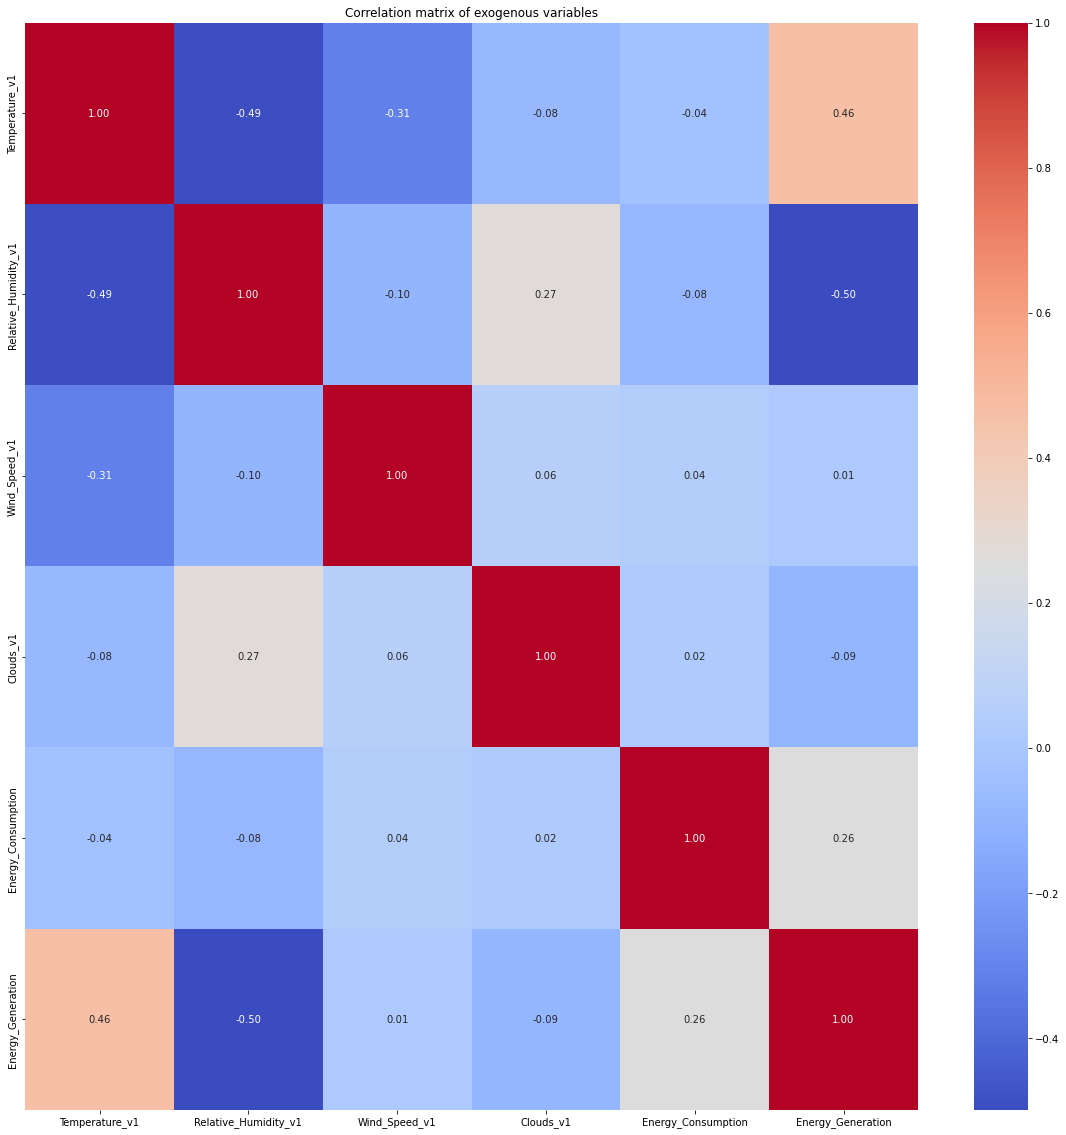

In [362]:
#Correlation Matrix of parameters (exogenous & target)
plt.figure(figsize=(20,20)) 
sns.heatmap(df_cons_weh.corr(),fmt=".2f", cmap='coolwarm',annot=True)
plt.title('Correlation matrix of exogenous variables',loc='center')

In [363]:
df_cons_weh['Hour'] = np.arange(len(df_cons_weh))

C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\4024980868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons_weh['Hour'] = np.arange(len(df_cons_weh))


In [364]:
df_cons_weh

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Energy_Consumption,Energy_Generation,new_Timestamp_UTC,Hour
new_Timestamp_UTC,,,,,,,,
2018-10-03 21:00:00,20.600,73.00,3.600000,18.75,2.9,0.0000,2018-10-03 21:00:00,0
2018-10-03 22:00:00,21.000,61.00,4.950000,18.75,2.7,0.0000,2018-10-03 22:00:00,1
2018-10-03 23:00:00,20.000,73.25,4.050000,6.25,2.6,0.0000,2018-10-03 23:00:00,2
2018-10-04 00:00:00,20.000,75.75,5.400000,25.00,2.7,0.0000,2018-10-04 00:00:00,3
2018-10-04 01:00:00,20.000,71.25,5.517000,25.00,2.6,0.0000,2018-10-04 01:00:00,4
...,...,...,...,...,...,...,...,...
2020-09-30 16:00:00,20.100,39.00,2.171685,12.50,2.5,0.0225,2020-09-30 16:00:00,15922
2020-09-30 17:00:00,19.175,44.75,0.862500,4.50,2.0,0.0000,2020-09-30 17:00:00,15923
2020-09-30 18:00:00,18.750,47.25,0.780000,16.00,2.0,0.0000,2020-09-30 18:00:00,15924


In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
# Add x-axis and y-axis
ax.plot(df_cons_weh['new_Timestamp_UTC'],
       df_cons_weh['Energy_Consumption'],
       color='purple')
# Set title and labels for axes
ax.set_title("Smart House ITI- Energy Consumption in kWh", fontsize = 20)
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Energy_Consumption - kWh', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(35, 15))
hours_plt=np.arange(0, 24, 1)
hours_plt
# Add x-axis and y-axis
ax.plot(df_cons_weh['Hour'][1:25],
       df_cons_weh['Energy_Consumption'][1:25],
       color='purple')
ax.plot(df_cons_weh['Hour'][1:25],
       df_cons_weh['Energy_Generation'][1:25],
       color='green')
# Set title and labels for axes
ax.set_title("Smart House ITI- Energy Consumption & Generation in kWh", fontsize = 24)
ax.set_xlabel('Hour', fontsize = 22)
ax.set_ylabel('Energy (kWh)', fontsize = 22)
ax.tick_params(axis='both', which='both', labelsize=22)
ax.legend(['Energy_Consumption', 'Energy_Generation'],fancybox=True,prop = {'size' : 24})
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(35, 15))
# Add x-axis and y-axis
ax.plot(df_cons_weh['new_Timestamp_UTC'][276:420],
       df_cons_weh['Energy_Consumption'][276:420],
       color='purple')
ax.plot(df_cons_weh['new_Timestamp_UTC'][276:420],
       df_cons_weh['Energy_Generation'][276:420],
       color='green')
# Set title and labels for axes
ax.set_title("Smart House ITI- Energy Consumption in kWh", fontsize = 22)
ax.set_xlabel('Date', fontsize = 22)
ax.set_ylabel('Energy (kWh)', fontsize = 22)
ax.tick_params(axis='both', which='both', labelsize=22)
ax.legend(['Energy_Consumption', 'Energy_Generation'],fancybox=True,prop = {'size' : 24})
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
# Add x-axis and y-axis
ax.plot(df_cons_weh['new_Timestamp_UTC'],
       df_cons_weh['Energy_Generation'],
       color='green')
# Set title and labels for axes
ax.set_title("Smart House ITI- PV Energy Generation in kWh", fontsize = 20)
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Energy_Generation - kWh', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

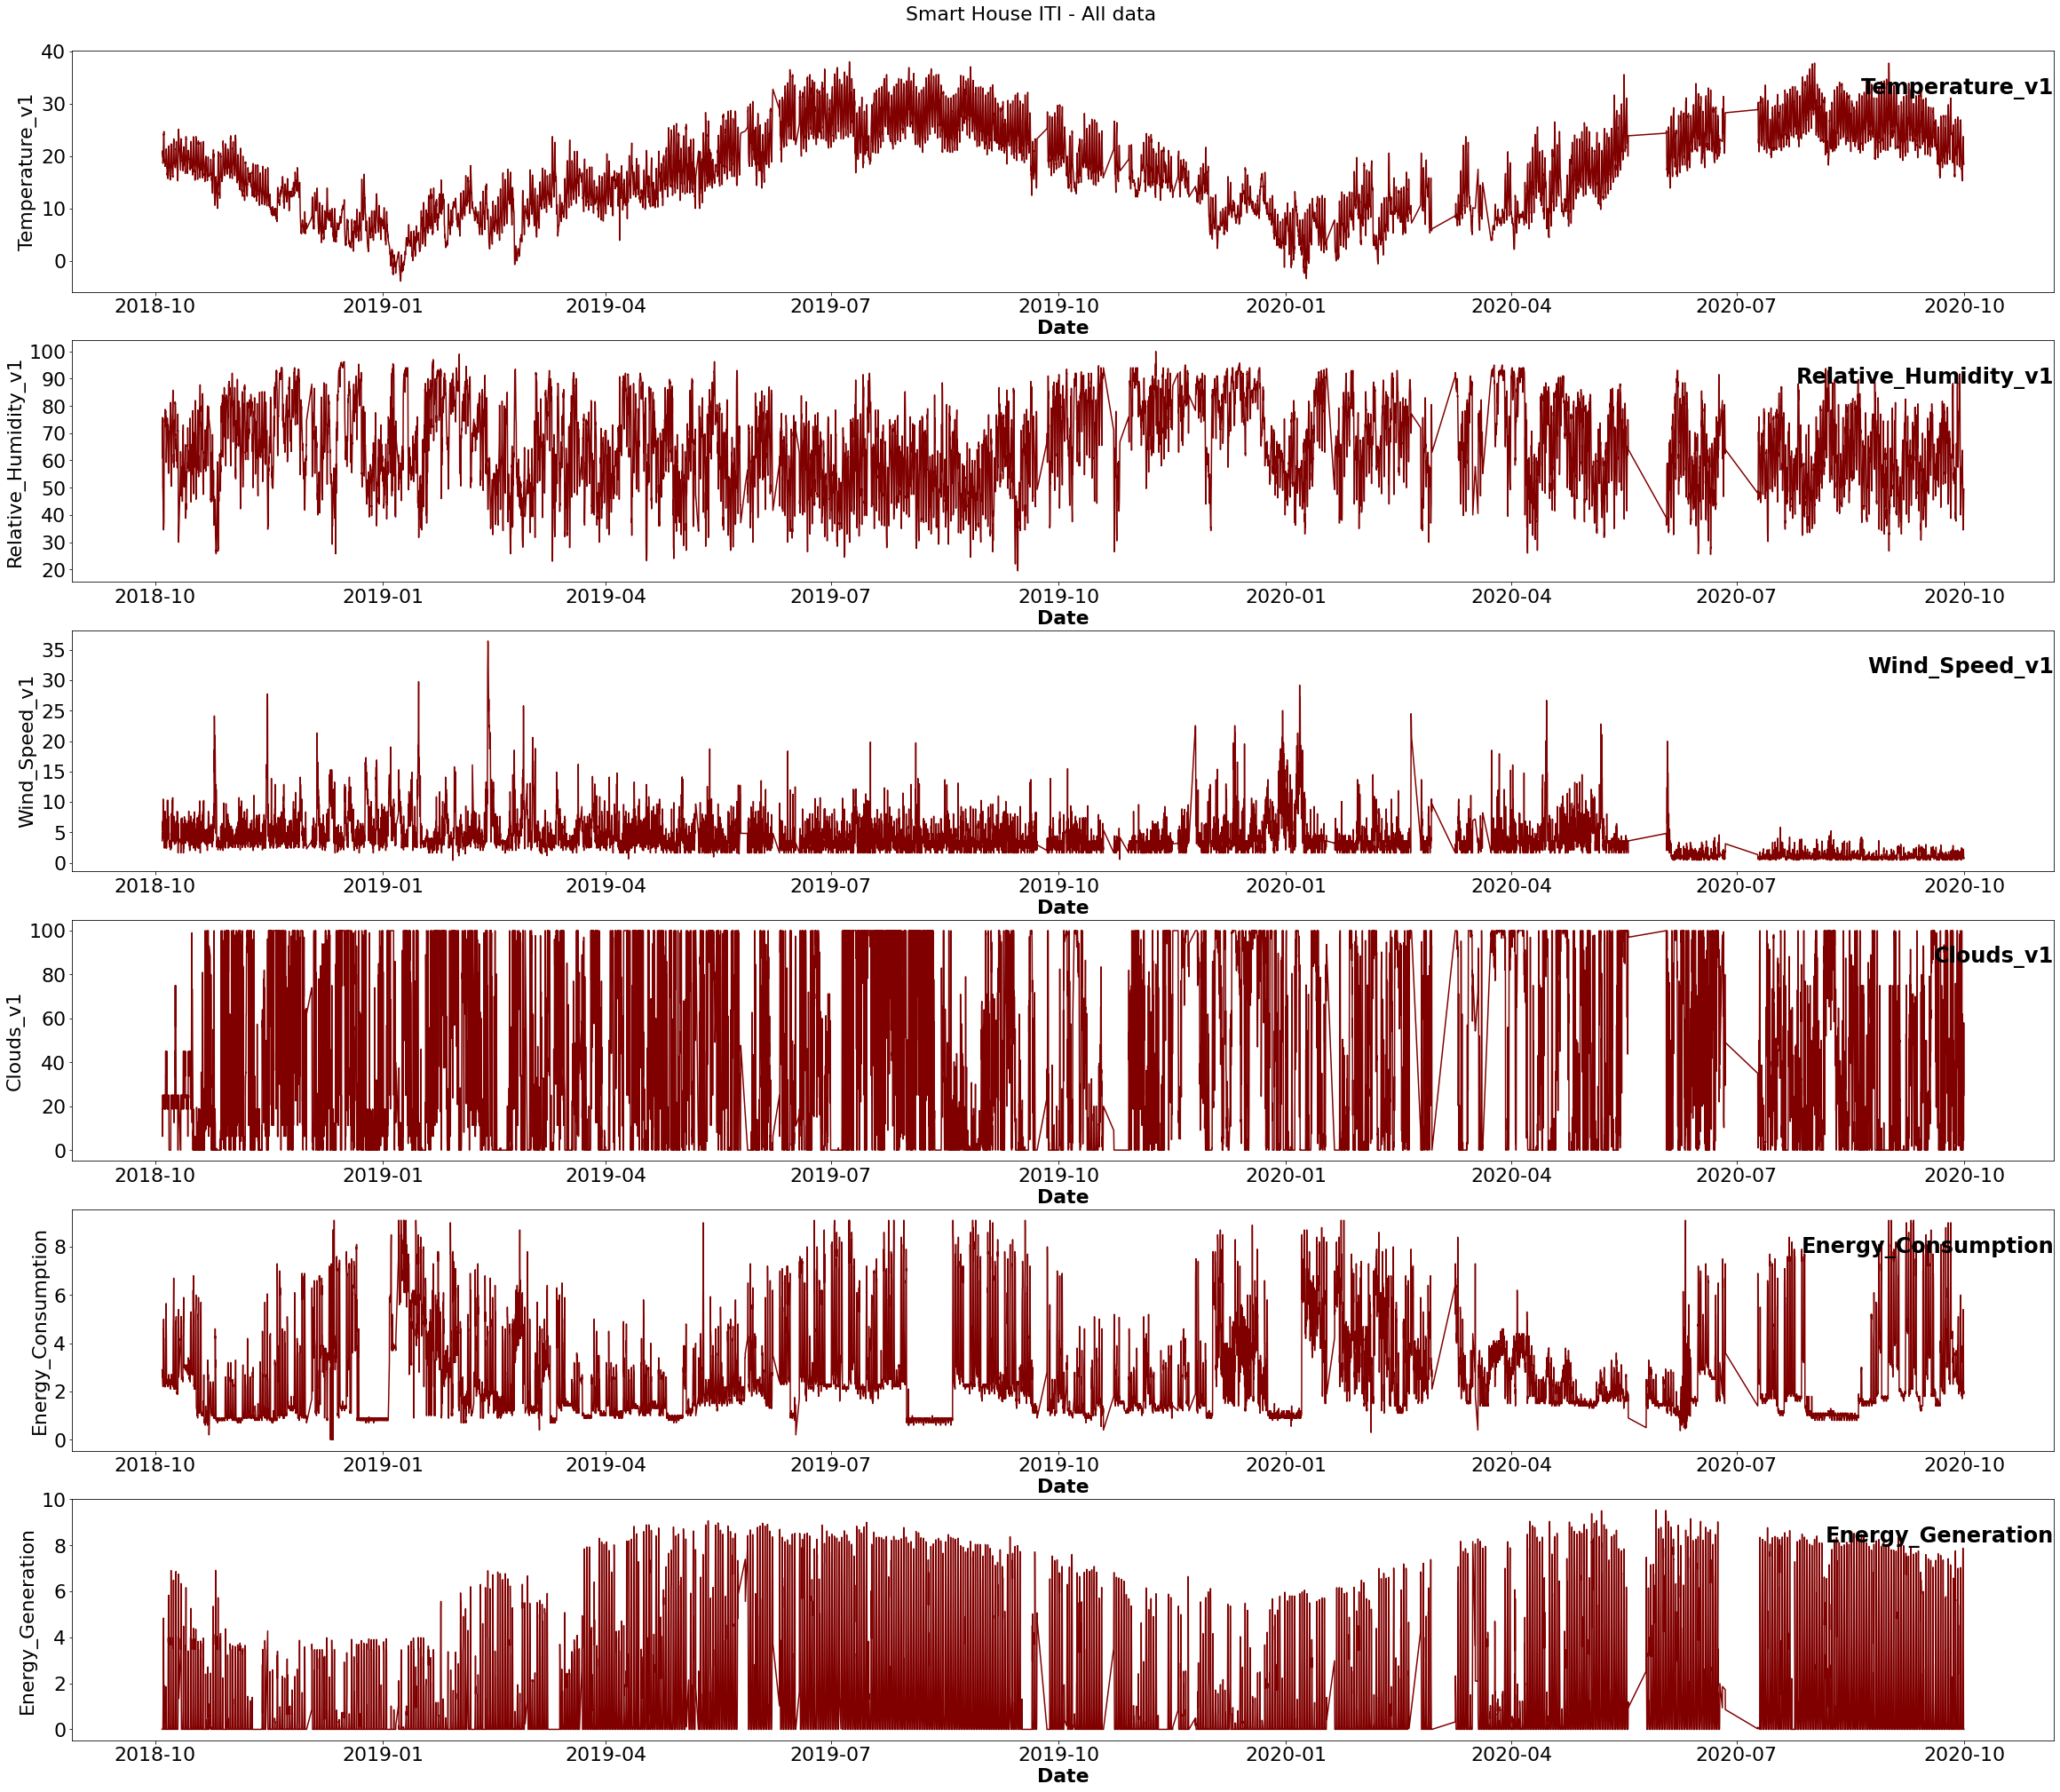

In [373]:
# plot target and each feature
groups = [0,1, 2, 3, 4,5]
i = 1
plt.figure(figsize = (40, 35))
for group in groups:
    plt.suptitle('Smart House ITI - All data', fontsize=22,y=0.9)
    plt.subplot(len(groups), 1, i)
    plt.plot(df_cons_weh['new_Timestamp_UTC'],df_cons_weh.values[:, group], color='maroon')
    plt.title(df_cons_weh.columns[group], y=0.8, loc='right',fontsize=24,fontweight='bold')
    plt.xlabel('Date', fontsize=22,fontweight='bold')
    plt.ylabel(df_cons_weh.columns[group],fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    i += 1
plt.show()

In [374]:
#resampling to 1month
df_temp_month = df_cons_weh.resample('M',on='new_Timestamp_UTC', closed='left').agg({'Temperature_v1':'mean', 'Relative_Humidity_v1':'mean','Wind_Speed_v1':'mean', 'Clouds_v1':'mean' })
df_temp_month['dates']=df_temp_month.index
df_temp_month['dates']=pd.to_datetime(df_temp_month['dates']).dt.strftime('%m-%Y')
df_temp_month

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,dates
new_Timestamp_UTC,,,,,
2018-10-31,18.549366,63.064971,5.143405,24.813902,10-2018
2018-11-30,13.850764,73.918924,5.128968,52.440625,11-2018
2018-12-31,7.319633,67.221782,5.998602,36.324388,12-2018
2019-01-31,5.414536,71.046244,5.849656,48.650293,01-2019
2019-02-28,8.679808,62.878077,6.205354,38.970962,02-2019
2019-03-31,12.671908,60.911129,4.983673,35.914974,03-2019
2019-04-30,14.871458,65.323958,4.478367,49.842014,04-2019
2019-05-31,19.845331,58.631476,4.338891,46.739239,05-2019
2019-06-30,25.944651,58.804955,4.046683,36.292201,06-2019


In [375]:
df_temp_month = df_cons_weh.resample('M',on='new_Timestamp_UTC', closed='left').agg({'Temperature_v1':'mean', 'Relative_Humidity_v1':'mean','Wind_Speed_v1':'mean', 'Clouds_v1':'mean' })

In [376]:
df_energy_month = df_cons_weh.resample('M',on='new_Timestamp_UTC', closed='left').agg({'Energy_Consumption':'mean'})
df_energy_month['dates']=df_energy_month.index
df_energy_month['dates']=pd.to_datetime(df_energy_month['dates']).dt.strftime('%m-%Y')
df_energy_month

,Energy_Consumption,dates
new_Timestamp_UTC,,
2018-10-31,2.310497,10-2018
2018-11-30,1.688125,11-2018
2018-12-31,2.697478,12-2018
2019-01-31,4.370211,01-2019
2019-02-28,2.775385,02-2019
2019-03-31,1.951751,03-2019
2019-04-30,1.551944,04-2019
2019-05-31,2.347135,05-2019
2019-06-30,3.177885,06-2019


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\1972803059.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


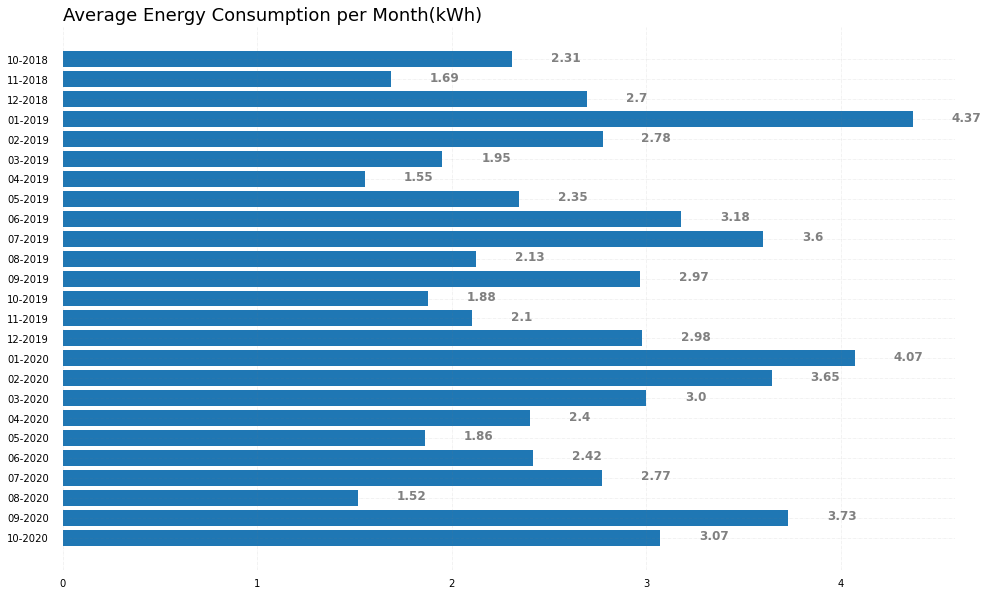

In [377]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(df_energy_month['dates'], df_energy_month['Energy_Consumption'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Average Energy Consumption per Month(kWh)',
             loc ='left', fontsize = 18)
 
# Show Plot
plt.show()

# Feature Engineering

In [381]:

from datetime import date

In [383]:
#Creating time-related features
quarter=df_cons_weh.new_Timestamp_UTC.dt.quarter
months = df_cons_weh.new_Timestamp_UTC.dt.month
day_of_months = df_cons_weh.new_Timestamp_UTC.dt.day
hours = df_cons_weh.new_Timestamp_UTC.dt.hour
minutes = df_cons_weh.new_Timestamp_UTC.dt.minute
to_one_hot = df_cons_weh.new_Timestamp_UTC.dt.day_name()
week_days= df_cons_weh.new_Timestamp_UTC.dt.weekday
is_weekend = to_one_hot.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
df_temp = df_cons_weh['new_Timestamp_UTC'].dt.date;

In [386]:
#Define work hours & off-hours
working_hours=((hours <= 18) & (hours >= 9)).apply(lambda x : 1 if x==True else 0)
off_hours=((hours > 18) | (hours < 9)).apply(lambda x : 1 if x==True else 0)

In [388]:
timestamp_features = pd.DataFrame({
    'quarter': quarter,
    'month' : months,
    'day_of_month' : day_of_months,
    'hour24' : hours,
    'is_weekend' : is_weekend,
    'working_hours': working_hours,
    'off_hours': off_hours,
    'Week_day':week_days
})
timestamp_features

,quarter,month,day_of_month,hour24,is_weekend,working_hours,off_hours,Week_day
new_Timestamp_UTC,,,,,,,,
2018-10-03 21:00:00,4,10,3,21,0,0,1,2
2018-10-03 22:00:00,4,10,3,22,0,0,1,2
2018-10-03 23:00:00,4,10,3,23,0,0,1,2
2018-10-04 00:00:00,4,10,4,0,0,0,1,3
2018-10-04 01:00:00,4,10,4,1,0,0,1,3
...,...,...,...,...,...,...,...,...
2020-09-30 16:00:00,3,9,30,16,0,1,0,2
2020-09-30 17:00:00,3,9,30,17,0,1,0,2
2020-09-30 18:00:00,3,9,30,18,0,1,0,2


### Timeseries transfromation (sliding window)

In [391]:
from tsextract.feature_extraction.extract import build_features, build_features_forecast

In [392]:
df_cons_weh.head(10)

,Temperature_v1,Relative_Humidity_v1,Wind_Speed_v1,Clouds_v1,Energy_Consumption,Energy_Generation,new_Timestamp_UTC,Hour
new_Timestamp_UTC,,,,,,,,
2018-10-03 21:00:00,20.600,73.00,3.600,18.75,2.9,0.000,2018-10-03 21:00:00,0
2018-10-03 22:00:00,21.000,61.00,4.950,18.75,2.7,0.000,2018-10-03 22:00:00,1
2018-10-03 23:00:00,20.000,73.25,4.050,6.25,2.6,0.000,2018-10-03 23:00:00,2
2018-10-04 00:00:00,20.000,75.75,5.400,25.00,2.7,0.000,2018-10-04 00:00:00,3
2018-10-04 01:00:00,20.000,71.25,5.517,25.00,2.6,0.000,2018-10-04 01:00:00,4
2018-10-04 02:00:00,20.000,57.75,5.625,25.00,2.5,0.000,2018-10-04 02:00:00,5
2018-10-04 03:00:00,19.550,50.00,6.840,25.00,2.4,0.000,2018-10-04 03:00:00,6
2018-10-04 04:00:00,18.625,49.25,5.238,25.00,2.3,0.040,2018-10-04 04:00:00,7
2018-10-04 05:00:00,18.750,47.75,8.460,25.00,2.2,0.332,2018-10-04 05:00:00,8


In [394]:
features_request = {
    "window": [24],
}
Cons_sliding = build_features(df_cons_weh['Energy_Consumption'], features_request, target_lag=1, include_tzero=True)

features_request = {
    "window": [12],
    
}
Temp_sliding  = build_features(df_cons_weh['Temperature_v1'], features_request, target_lag=1, include_tzero=True)
Gen_sliding = build_features(df_cons_weh['Energy_Generation'], features_request, target_lag=1, include_tzero=True)

In [396]:
Cons_sliding

,T-24,T-23,T-22,T-21,T-20,T-19,T-18,T-17,T-16,T-15,...,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,tzero,Target_Tplus1
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-04 21:00:00,2.9,2.7,2.6,2.7,2.6,2.5,2.4,2.3,2.2,3.3,...,4.3,4.1,3.1,2.6,2.3,2.4,2.3,2.4,2.3,2.2
2018-10-04 22:00:00,2.7,2.6,2.7,2.6,2.5,2.4,2.3,2.2,3.3,4.0,...,4.1,3.1,2.6,2.3,2.4,2.3,2.4,2.3,2.2,2.5
2018-10-04 23:00:00,2.6,2.7,2.6,2.5,2.4,2.3,2.2,3.3,4.0,4.6,...,3.1,2.6,2.3,2.4,2.3,2.4,2.3,2.2,2.5,2.2
2018-10-05 00:00:00,2.7,2.6,2.5,2.4,2.3,2.2,3.3,4.0,4.6,4.4,...,2.6,2.3,2.4,2.3,2.4,2.3,2.2,2.5,2.2,2.3
2018-10-05 01:00:00,2.6,2.5,2.4,2.3,2.2,3.3,4.0,4.6,4.4,4.5,...,2.3,2.4,2.3,2.4,2.3,2.2,2.5,2.2,2.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 15:00:00,3.7,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,...,3.6,3.9,3.3,3.2,4.7,5.2,5.4,5.1,4.9,2.5
2020-09-30 16:00:00,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,...,3.9,3.3,3.2,4.7,5.2,5.4,5.1,4.9,2.5,2.0
2020-09-30 17:00:00,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,...,3.3,3.2,4.7,5.2,5.4,5.1,4.9,2.5,2.0,2.0


In [397]:
#Extra features from statistics

features_request = {
    "window": [72],
}
Cons72_temp = build_features(df_cons_weh['Energy_Consumption'], features_request, target_lag=1, include_tzero=True)
Cons48 = Cons72_temp.loc[:,['T-48']]
Cons48.rename(columns={'T-48':'T-48Cons'}, inplace = True)

Cons72 = Cons72_temp.loc[:,['T-72']]
Cons72.rename(columns={'T-72':'T-72Cons'}, inplace = True)

std24_cons=pd.Series(abs((Cons72_temp['T-1']+Cons72_temp['T-24'])/2 - Cons72_temp['T-1']), name='std24_cons')


features_request = {
    "window": [72],
}
Temp72_temp = build_features(df_cons_weh['Temperature_v1'], features_request, target_lag=1, include_tzero=True)

Temp48 = Temp72_temp.loc[:,['T-48']] 
Temp48.rename(columns={'T-48':'T-48Temp'}, inplace = True)
Temp72 = Temp72_temp.loc[:,['T-72']] 
Temp72.rename(columns={'T-72':'T-72Temp'}, inplace = True)

std72_temp=pd.Series(abs((Temp72_temp['T-1']+Temp72_temp['T-72'])/2 - Temp72_temp['T-1']), name='std72_temp')
std24_temp=pd.Series(abs((Temp72_temp['T-1']+Temp72_temp['T-24'])/2 - Temp72_temp['T-1']), name='std24_temp')
std12_temp=pd.Series(abs((Temp72_temp['T-1']+Temp72_temp['T-12'])/2 - Temp72_temp['T-1']), name='std12_temp')

In [399]:
Cons_sliding.rename(columns = {'tzero':'Energy_Consumption'}, inplace = True)
Cons_sliding

,T-24,T-23,T-22,T-21,T-20,T-19,T-18,T-17,T-16,T-15,...,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,Energy_Consumption,Target_Tplus1
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-04 21:00:00,2.9,2.7,2.6,2.7,2.6,2.5,2.4,2.3,2.2,3.3,...,4.3,4.1,3.1,2.6,2.3,2.4,2.3,2.4,2.3,2.2
2018-10-04 22:00:00,2.7,2.6,2.7,2.6,2.5,2.4,2.3,2.2,3.3,4.0,...,4.1,3.1,2.6,2.3,2.4,2.3,2.4,2.3,2.2,2.5
2018-10-04 23:00:00,2.6,2.7,2.6,2.5,2.4,2.3,2.2,3.3,4.0,4.6,...,3.1,2.6,2.3,2.4,2.3,2.4,2.3,2.2,2.5,2.2
2018-10-05 00:00:00,2.7,2.6,2.5,2.4,2.3,2.2,3.3,4.0,4.6,4.4,...,2.6,2.3,2.4,2.3,2.4,2.3,2.2,2.5,2.2,2.3
2018-10-05 01:00:00,2.6,2.5,2.4,2.3,2.2,3.3,4.0,4.6,4.4,4.5,...,2.3,2.4,2.3,2.4,2.3,2.2,2.5,2.2,2.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 15:00:00,3.7,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,...,3.6,3.9,3.3,3.2,4.7,5.2,5.4,5.1,4.9,2.5
2020-09-30 16:00:00,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,...,3.9,3.3,3.2,4.7,5.2,5.4,5.1,4.9,2.5,2.0
2020-09-30 17:00:00,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,...,3.3,3.2,4.7,5.2,5.4,5.1,4.9,2.5,2.0,2.0


In [400]:
Cons_sliding.drop("Target_Tplus1",axis = 1, inplace = True)
Cons_sliding = Cons_sliding.add_suffix('Cons')
Gen_sliding.drop("Target_Tplus1",axis = 1, inplace = True)
Gen_sliding.drop("tzero",axis = 1, inplace = True)
Gen_sliding = Gen_sliding.add_suffix('Gen')
Temp_sliding.drop("Target_Tplus1",axis = 1, inplace = True)
Temp_sliding = Temp_sliding.add_suffix('Temp')


In [402]:
features_lag=pd.concat(
    [Cons_sliding,
     Gen_sliding, 
     Temp_sliding, 
     Cons48, Cons72, std24_cons
    ],axis = 1)
features_lag

,T-24Cons,T-23Cons,T-22Cons,T-21Cons,T-20Cons,T-19Cons,T-18Cons,T-17Cons,T-16Cons,T-15Cons,...,T-6Temp,T-5Temp,T-4Temp,T-3Temp,T-2Temp,T-1Temp,tzeroTemp,T-48Cons,T-72Cons,std24_cons
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-04 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.550,18.625,18.750,18.900,19.450,20.975,21.825,NaN,NaN,NaN
2018-10-04 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.625,18.750,18.900,19.450,20.975,21.825,23.050,NaN,NaN,NaN
2018-10-04 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.750,18.900,19.450,20.975,21.825,23.050,24.275,NaN,NaN,NaN
2018-10-04 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.900,19.450,20.975,21.825,23.050,24.275,24.275,NaN,NaN,NaN
2018-10-04 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.450,20.975,21.825,23.050,24.275,24.275,24.025,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 15:00:00,3.7,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,...,21.250,21.950,22.650,23.300,23.300,23.750,22.975,2.8,3.5,0.70
2020-09-30 16:00:00,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,...,21.950,22.650,23.300,23.300,23.750,22.975,20.100,2.3,3.7,1.45
2020-09-30 17:00:00,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,...,22.650,23.300,23.300,23.750,22.975,20.100,19.175,2.3,3.3,0.20


In [403]:
features_temp=pd.concat(
    [
    timestamp_features,
    Cons48, Cons72, std24_cons,
    df_cons_weh['Energy_Consumption'],
    df_cons_weh['Temperature_v1']
    ],
    axis = 1)
features_temp=features_temp.dropna()


<AxesSubplot:>

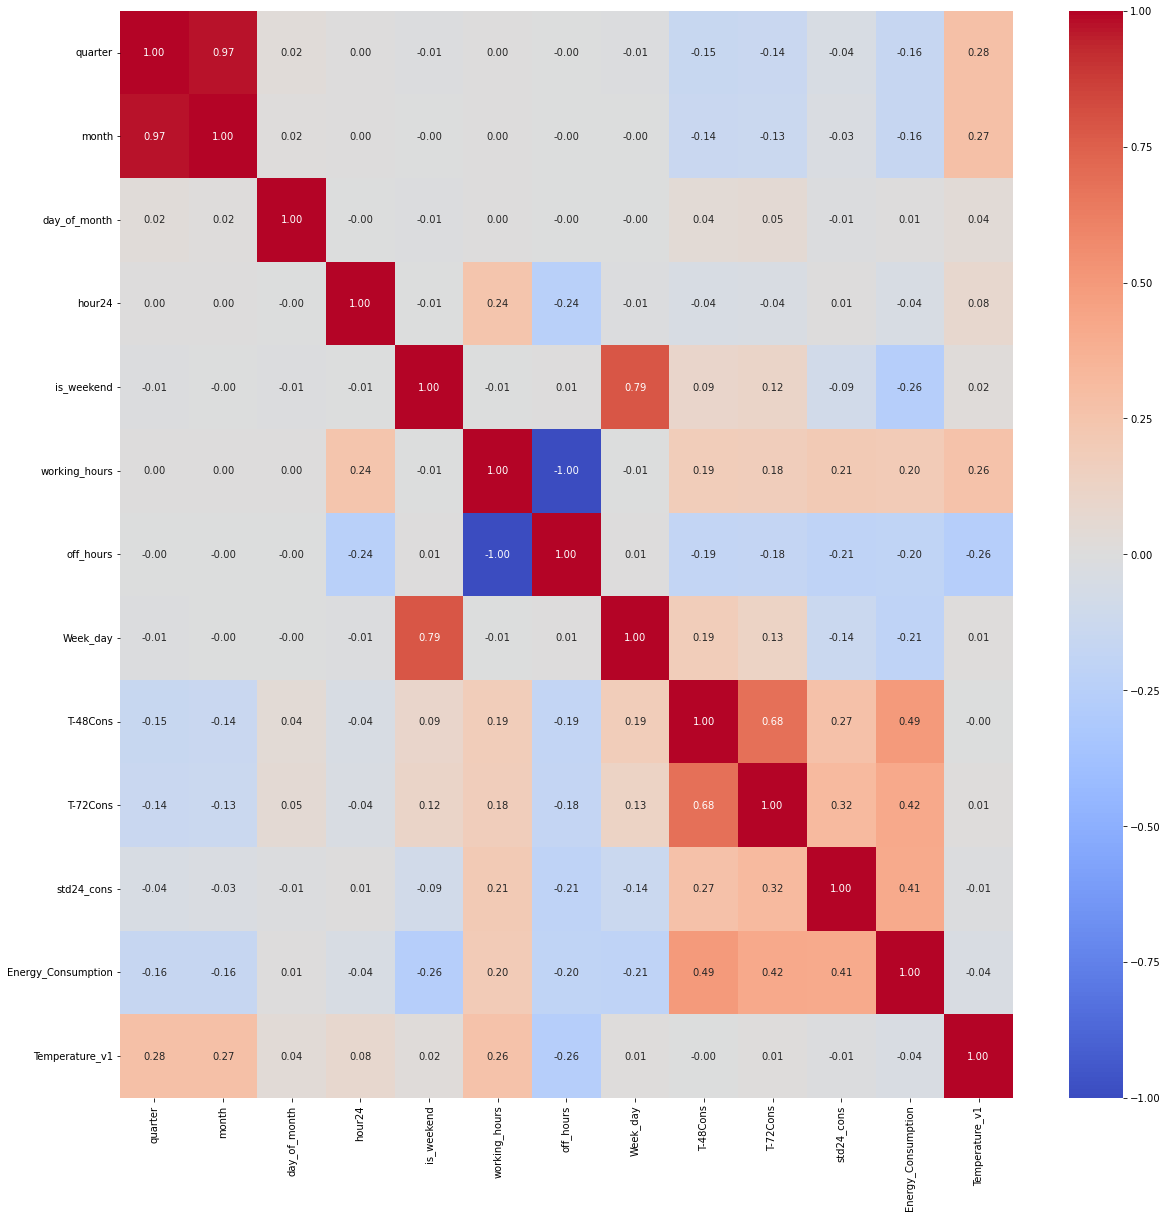

In [404]:
Core
plt.figure(figsize=(20,20)) 
sns.heatmap(features_temp.corr(),fmt=".2f", cmap='coolwarm',annot=True)

In [405]:
features=pd.concat(
    [
    features_lag,
    timestamp_features, 
    ],
    axis = 1)

features

,T-24Cons,T-23Cons,T-22Cons,T-21Cons,T-20Cons,T-19Cons,T-18Cons,T-17Cons,T-16Cons,T-15Cons,...,T-72Cons,std24_cons,quarter,month,day_of_month,hour24,is_weekend,working_hours,off_hours,Week_day
2018-10-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,10,3,21,0,0,1,2
2018-10-03 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,10,3,22,0,0,1,2
2018-10-03 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,10,3,23,0,0,1,2
2018-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,10,4,0,0,0,1,3
2018-10-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,10,4,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 16:00:00,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,...,3.7,1.45,3,9,30,16,0,1,0,2
2020-09-30 17:00:00,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,...,3.3,0.20,3,9,30,17,0,1,0,2
2020-09-30 18:00:00,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,1.7,...,2.7,0.00,3,9,30,18,0,1,0,2
2020-09-30 19:00:00,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,1.7,2.4,...,2.7,0.05,3,9,30,19,0,0,1,2


In [406]:
features=features.dropna()
features.index.name='new_Timestamp_UTC'
features

,T-24Cons,T-23Cons,T-22Cons,T-21Cons,T-20Cons,T-19Cons,T-18Cons,T-17Cons,T-16Cons,T-15Cons,...,T-72Cons,std24_cons,quarter,month,day_of_month,hour24,is_weekend,working_hours,off_hours,Week_day
new_Timestamp_UTC,,,,,,,,,,,,,,,,,,,,,
2018-10-06 21:00:00,2.4,2.4,2.4,2.5,2.4,2.3,2.3,2.2,2.2,2.4,...,2.9,0.05,4,10,6,21,1,0,1,5
2018-10-06 22:00:00,2.4,2.4,2.5,2.4,2.3,2.3,2.2,2.2,2.4,2.3,...,2.7,0.05,4,10,6,22,1,0,1,5
2018-10-06 23:00:00,2.4,2.5,2.4,2.3,2.3,2.2,2.2,2.4,2.3,2.3,...,2.6,0.05,4,10,6,23,1,0,1,5
2018-10-07 00:00:00,2.5,2.4,2.3,2.3,2.2,2.2,2.4,2.3,2.3,2.4,...,2.7,0.10,4,10,7,0,1,0,1,6
2018-10-07 01:00:00,2.4,2.3,2.3,2.2,2.2,2.4,2.3,2.3,2.4,2.3,...,2.6,0.00,4,10,7,1,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 15:00:00,3.7,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,...,3.5,0.70,3,9,30,15,0,1,0,2
2020-09-30 16:00:00,2.0,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,...,3.7,1.45,3,9,30,16,0,1,0,2
2020-09-30 17:00:00,2.1,2.0,1.9,2.0,2.1,1.9,1.8,2.0,1.9,2.0,...,3.3,0.20,3,9,30,17,0,1,0,2


# Modelling

In [ ]:
y=features['Energy_ConsumptionCons']
features.drop('Energy_ConsumptionCons',axis = 1, inplace = True)
X=features

In [410]:
#Library imports
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV, KFold, RandomizedSearchCV,train_test_split, StratifiedKFold,TimeSeriesSplit
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sktime.forecasting.model_selection import temporal_train_test_split
import time
from statistics import mean
from joblib import dump, load

#Models (regressors)
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import lightgbm
from lightgbm import LGBMRegressor, plot_importance 
import catboost as cb
from sklearn.neural_network import MLPRegressor


#Functions of MAPE/SMAPE
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

def MAPE_function (y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

 ### Train-Test Split


In [411]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y,X, test_size=0.2)

In [415]:
MAPE=[]
MAE =[]
RMSE=[]
MAPE=[]
SMAPE=[]
R_squared=[]
ET=[]

In [416]:
#Evaluation Metrics
def metrics (y_test,y_pred,model_name,count):
    print(f"Model:{model_name}")
    print("MAPE (%):",np.round(100*(mean_absolute_percentage_error(y_test, y_pred)),3))
    MAPE.insert(count,np.round(100*(mean_absolute_percentage_error(y_test, y_pred)),3))
    print("MAE (kWh):", np.round((mean_absolute_error(y_test, y_pred,)),3))
    MAE.insert(count,np.round((mean_absolute_error(y_test, y_pred,)),3))
    print("RMSE (kWh):",np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))  
    RMSE.insert(count,np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))                          
    print("R-squared (%):", np.round(100*r2_score(y_test,y_pred),3))
    R_squared.insert(count,np.round(100*r2_score(y_test,y_pred),3))
    print("SMAPE (%):", np.round(smape(y_test,y_pred),3))
    SMAPE.insert(count,np.round(smape(y_test,y_pred),3))
    print("ET(seconds):", np.round((end-start),3))
    ET.insert(count,np.round((end-start),3))
    return

In [417]:
#Feature importance plot
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Feature Importance: ' + model_type)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')

In [ ]:
#Ensembling-Cross Validation
cv_ΜΑΕ_means =[]
cv_RMSE_means=[]
cv_R2_means=[]
cv_MAPE_means=[]
Nsplits=5
cv=TimeSeriesSplit(n_splits=Nsplits)
#cv=KFold(n_splits=Nsplits)
fig,ax=plt.subplots(figsize=(10,5))
for ii,(tr,tt) in enumerate (cv.split(X_test, y_test)):
    #Plot Training and Test indices
    l1=ax.scatter(tr,[ii]*len(tr), c=[plt.cm.coolwarm(.1)], marker='_',lw=6)
    l2=ax.scatter(tt,[ii]*len(tt), c=[plt.cm.coolwarm(.9)],marker='_',lw=6)
    ax.set(ylim=[Nsplits,-1], title='TimeSeriesSplit behavior',xlabel='data index', ylabel='CV iteration')
    ax.legend([l1,l2],['Training','Validation'])

def cv_score (estimator,X,y,Nsplits,count):
    cv=TimeSeriesSplit(n_splits=Nsplits)
    mape_scorer = make_scorer(MAPE_function)

    MAE_cross = (-cross_val_score(estimator, X, y, cv=cv,scoring='neg_mean_absolute_error', n_jobs=1))
    RMSE_cross = (-cross_val_score(estimator, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=1))
    R2_cross = 100*(cross_val_score(estimator, X, y, cv=cv, scoring='r2',n_jobs=1))
    MAPE_cross=(cross_val_score(estimator, X, y, cv=cv, scoring=mape_scorer,n_jobs=1))
    #y_pred = cross_val_predict(estimator, X, y, cv=cv, n_jobs=-1)
    
    cv_ΜΑΕ_means.insert(count,MAE_cross.mean())
    cv_RMSE_means.insert(count,RMSE_cross.mean())
    cv_R2_means.insert(count,R2_cross.mean())
    cv_MAPE_means.insert(count,MAPE_cross.mean())
    
    print(f"MAE: {MAE_cross.mean()} (+/- {MAE_cross.std()})")
    print(f"RMSE: {RMSE_cross.mean()} (+/- {RMSE_cross.std()})")
    print(f"R-squared: {R2_cross.mean()} (+/- {R2_cross.std()})")
    print(f"MAPE: {MAPE_cross.mean()} (+/- {MAPE_cross.std()})")
    return 

    

 ### XGBoost 

In [ ]:
start = time.time()
XGBoost = xgb.XGBRegressor(importance_type='gain',
    objective='reg:squarederror',
    n_estimators=850,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=0.7,
    subsample=1.0
)
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)
end = time.time()
metrics (y_test,y_pred,'XGBoost',0)
dump(XGBoost, 'filename.XGBoost_stored') 

In [ ]:
cv_score(XGBoost,X,y,Nsplits,0)


In [ ]:
importance = XGBoost.feature_importances_
plot_feature_importance(importance,X_train.columns,'XGB Regressor')

In [ ]:
y_pred_all=pd.DataFrame()
y_pred_all['XGBoost']=(y_pred)
y_pred_XGB= pd.DataFrame(y_pred)
y_pred_XGB.rename(columns = {0: 'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_XGB.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (XGB Regressor)')
plt.legend()

 ### Random Forest

In [ ]:
start=time.time()
RF = RandomForestRegressor(
bootstrap= True,
max_features='auto',
max_depth= 40,                            
min_samples_leaf= 6,
min_samples_split=6,
n_estimators = 500,
n_jobs=-1
)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pred_RF=y_pred
end = time.time()
metrics (y_test,y_pred,'Random Forest',1)
dump(RF, 'filename.RF_stored') 

C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model:Random Forest
MAPE (%): 11.546
MAE (kWh): 0.273
RMSE (kWh): 0.531
R-squared (%): 91.573
SMAPE (%): 10.295
ET(seconds): 12.93


['filename.RF_stored']

In [ ]:
cv_score(RF,X,y,Nsplits,1)

In [ ]:
importance = RF.feature_importances_
importance

In [ ]:
plot_feature_importance(importance,X_train.columns,'Random Forest')

In [ ]:
y_pred_all['RF']=(y_pred)
y_pred_RF= pd.DataFrame(y_pred)
y_pred_RF.rename(columns = {0:'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_RF.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (RF Regressor)')
plt.legend()

### LGBM

In [ ]:
start=time.time()
LGBM = LGBMRegressor(
max_depth=10,
num_leaves=22,
min_data_in_leaf=80,
max_bin=90,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_test)
y_pred_LGBM=y_pred 
end = time.time()
metrics (y_test,y_pred,'LGBM',2)
dump(LGBM, 'filename.LGBM_stored') 

In [ ]:
cv_score(LGBM,X,y,Nsplits,2)

In [ ]:
importance=LGBM.feature_importances_
plot_feature_importance(importance,X_train.columns,'LGBM')

In [ ]:
y_pred_all['LGBM']=(y_pred)
y_pred_LGBM=pd.DataFrame(y_pred)
y_pred_LGBM.rename(columns = {0:'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_LGBM.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (LGBM Regressor)')
plt.legend()

## CATBoost

In [ ]:
start = time.time()
CATBoost = cb.CatBoostRegressor(
    iterations=850,
    learning_rate=0.02,
    depth=6,
    l2_leaf_reg=0.6,
    verbose=0,
    loss_function='MAE'
)

CATBoost.fit(X_train, y_train)
y_pred = CATBoost.predict(X_test)
y_pred_CATB=y_pred 
end = time.time()
metrics (y_test,y_pred,'CATBoost',3)
dump(CATBoost, 'filename.CATBoost_stored') 

In [ ]:
cv_score(CATBoost,X,y,Nsplits,3)

MAE: 0.3534521024287314 (+/- 0.04718857118617681)
RMSE: 0.6285630730609004 (+/- 0.06357829858285052)
R-squared: 86.51393967547486 (+/- 3.2687331568134805)
MAPE: 12.984804461281888 (+/- 1.451434517680126)


In [ ]:
importance=CATBoost.feature_importances_
plot_feature_importance(importance,X_train.columns,'CATBoost')

In [ ]:
y_pred_all['CATBoost']=(y_pred)
y_pred_CATB=pd.DataFrame(y_pred)
y_pred_CATB.rename(columns = {0:'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_CATB.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (CATBoost Regressor)')
plt.legend()

## MLP

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(50,100,50),
                   max_iter=2000,
                   solver='lbfgs',
                   activation ='relu', 
                   learning_rate_init=0.01, 
                   alpha=0.005,
                   learning_rate='adaptive', 
                   warm_start=True,
                
                   )   
start=time.time()

MLP.fit(
X_train,
y_train,
)

y_pred_MLP = MLP.predict(X_test)
#testPredict = model.predict(y_test)
#y_pred_MLP = y_sc.inverse_transform(y_pred_MLP)
end = time.time()
metrics (y_test,y_pred_MLP,'MLP',4)
dump(MLP, 'filename.MLP_stored') 

In [ ]:
cv_score(MLP,X,y,Nsplits,4)

In [ ]:
y_pred_all['MLP']=(y_pred_MLP)
y_pred_MLP_pd=pd.DataFrame(y_pred_MLP)
y_pred_MLP_pd.rename(columns = {0:'Predicted MLP'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_MLP_pd.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (MLP Regressor)')
plt.legend()

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Dropout,Bidirectional,TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras import activations
from sklearn.model_selection import KFold,GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def get_model(params, input_shape):
    model = Sequential()
    model.add(LSTM(units=(params["lstm_units"]),activation=params["activ_function"], return_sequences=True, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    model.add(Dropout(rate=params["dropout"]))
    
    model.add(LSTM(units=(params["lstm_units"]),activation=params["activ_function"], return_sequences=False))
    model.add(Dropout(rate=params["dropout"]))

    model.add(Dense(y_train_LSTM.shape[1],activation='linear'))

    model.compile(loss=params["loss"],
              	optimizer=params["optimizer"],
              	metrics=[MeanAbsoluteError(),RootMeanSquaredError()])

    return model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_sc = MinMaxScaler(feature_range=(-1,1))
y_sc = MinMaxScaler(feature_range=(-1,1))
y_train=np.array(y_train).reshape(-1,1)
#y_train=scale()

y_test=np.array(y_test).reshape(-1,1)

X_train_LSTM = X_sc.fit_transform(X_train)
X_train_LSTM=X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
y_train_LSTM = y_sc.fit_transform(y_train)

X_test_LSTM = X_sc.fit_transform(X_test)
X_test_LSTM=X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))

y_test_LSTM = y_sc.fit_transform(y_test)
y_LSTM=y_sc.fit_transform(y_test)
#y_test_LSTM=y_test_LSTM.ravel()

X_LSTM = X_sc.fit_transform(X)
X_LSTM=X_LSTM.reshape((X_LSTM.shape[0], 1, X_LSTM.shape[1]))
y_LSTM_temp=np.array(y).reshape(-1,1)
y_LSTM= y_sc.fit_transform(y_LSTM_temp)

In [ ]:
X_train_LSTM.shape

(12683, 1, 60)

In [ ]:
from tensorflow.keras.layers import LSTM,Dense,Dropout,Bidirectional,TimeDistributed
#LSTM Parameters
params = {
	"activ_function" : 'relu',
    "loss": "mae",
	"optimizer": 'RMSprop',
	"dropout": 0.2,
	"lstm_units": 128,
	"epochs": 40,
	"batch_size": 128,
	"es_patience" : 20
}


LSTM = get_model(params=params, input_shape=(X_train_LSTM.shape[1],X_train_LSTM.shape[2]))

In [ ]:

start=time.time()
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',mode='min', patience=params["es_patience"])
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'lstm__fold.ckpt',
        monitor='val_mean_absolute_error',
        mode="min",
        save_best_only=False,
        save_weights_only=True,
        verbose=1
        )

history=LSTM.fit(
X_train_LSTM,
y_train_LSTM,
validation_data=(X_test_LSTM,y_test_LSTM),
epochs=params["epochs"],
batch_size=params["batch_size"],
verbose=2,
validation_split=0.2,
callbacks=[es_callback,checkpoint_callback]
)


Epoch 1/40

Epoch 1: saving model to lstm__fold.ckpt
100/100 - 3s - loss: 0.1791 - mean_absolute_error: 0.1791 - root_mean_squared_error: 0.2543 - val_loss: 0.1142 - val_mean_absolute_error: 0.1142 - val_root_mean_squared_error: 0.1799 - 3s/epoch - 29ms/step
Epoch 2/40

Epoch 2: saving model to lstm__fold.ckpt
100/100 - 0s - loss: 0.1299 - mean_absolute_error: 0.1299 - root_mean_squared_error: 0.1834 - val_loss: 0.0925 - val_mean_absolute_error: 0.0925 - val_root_mean_squared_error: 0.1549 - 384ms/epoch - 4ms/step
Epoch 3/40

Epoch 3: saving model to lstm__fold.ckpt
100/100 - 0s - loss: 0.1190 - mean_absolute_error: 0.1190 - root_mean_squared_error: 0.1721 - val_loss: 0.1459 - val_mean_absolute_error: 0.1459 - val_root_mean_squared_error: 0.1779 - 371ms/epoch - 4ms/step
Epoch 4/40

Epoch 4: saving model to lstm__fold.ckpt
100/100 - 0s - loss: 0.1153 - mean_absolute_error: 0.1153 - root_mean_squared_error: 0.1671 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906 - val_root_mean_squar

In [ ]:
#LSTM training metrics
print(history.history.keys())

print(f"")
y_pred_LSTM = LSTM.predict(X_test_LSTM)
#testPredict = model.predict(y_test)
y_pred_LSTM = y_sc.inverse_transform(y_pred_LSTM)
end = time.time()
metrics (y_test,y_pred_LSTM,'LSTM',5)
#dump(LSTM, 'filename.MLP_stored') 
LSTM.save("LSTM_model")
print(history.history.keys())

#Plot Loss
plt.figure(figsize=(12,10))
plt.subplots_adjust(
                    wspace=0.5,
                    hspace=0.5)
plt.subplot(3,1,1)
plt.plot(history.history['loss'], '-', mfc='none', markersize=10, 
label='Train')
plt.plot(history.history['val_loss'], '-', mfc='none', 
markersize=10, label='Validation')
plt.title('LSTM Model Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#Plot Accuracy
plt.subplot(3,1,2)
plt.plot(history.history['root_mean_squared_error'], '-', mfc='none', markersize=10, 
label='Train')
plt.plot(history.history['val_root_mean_squared_error'], '-', mfc='none', 
markersize=10, label='Validation')
plt.title('LSTM Model Train vs Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

#Plot MAE
plt.subplot(3,1,3)
plt.plot(history.history['mean_absolute_error'], '-', mfc='none', markersize=10, 
label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], '-', mfc='none', 
markersize=10, label='Validation MAE')
plt.title('LSTM Model Train vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

In [ ]:
print("Evaluate on test data")
results = LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose = 0)
print('Test loss:', results[0]) 
print('Test accuracy:', results[1])

Evaluate on test data
Test loss: 0.0689009428024292
Test accuracy: 0.0689009428024292


In [ ]:
y_pred_all['LSTM']=(y_pred_LSTM)
y_pred_LSTM_pd=pd.DataFrame(y_pred_LSTM)
y_pred_LSTM_pd.rename(columns = {0:'Predicted'}, inplace = True)
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_LSTM_pd.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (LSTM)')
plt.legend()

In [ ]:
#y_test.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(55, 25))
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test.rename(columns = {0:'Actual Energy Load'}, inplace = True)
y_test[0:48].plot(ax=ax, label='Actual', style='--',linewidth=6)
y_pred_all['XGBoost'][0:48].plot(ax=ax, label='XGBoost', style='.-',linewidth=5)
y_pred_all['RF'][0:48].plot(ax=ax, label='RF', style='.-',linewidth=5)
y_pred_all['LGBM'][0:48].plot(ax=ax, label='LGBM', style='.-',linewidth=5)
y_pred_all['CATBoost'][0:48].plot(ax=ax, label='CATBoost', style='.-',linewidth=5)
y_pred_all['MLP'][0:48].plot(ax=ax, label='MLP', style='.-',linewidth=5)
y_pred_all['LSTM'][0:48].plot(ax=ax, label='LSTM', style='.-',linewidth=5)
plt.ylabel('Energy Consumption',fontsize = 22)
plt.xlabel('Hour',fontsize = 22)
plt.title('ITI Smart Home: Load Forecast',fontsize = 26)
ax.tick_params(axis='both', which='both', labelsize=22)
plt.legend(prop = {'size' : 26})

In [ ]:
from matplotlib.ticker import FixedLocator, FixedFormatter
x_formatter = FixedFormatter([
    "0", "8", "16", "24","32", "40", "48"])

fig, ax = plt.subplots(1, 1, figsize=(50, 30))
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test.rename(columns = {0:'Actual Energy Load'}, inplace = True)
y_test[172:220].plot(ax=ax, label='Actual Energy Load', style='--',linewidth=6)
y_pred_all['XGBoost'][172:220].plot(ax=ax, label='XGBoost', style='.-',linewidth=5)
y_pred_all['RF'][172:220].plot(ax=ax, label='RF', style='.-',linewidth=5)
y_pred_all['LGBM'][172:220].plot(ax=ax, label='LGBM', style='.-',linewidth=5)
y_pred_all['CATBoost'][172:220].plot(ax=ax, label='CATBoost', style='.-',linewidth=5)
y_pred_all['MLP'][172:220].plot(ax=ax, label='MLP', style='.-',linewidth=5)
y_pred_all['LSTM'][172:220].plot(ax=ax, label='LSTM', style='.-',linewidth=5)
plt.ylabel('Energy Consumption',fontsize = 28)
plt.xlabel('Hour',fontsize = 28, )
plt.title('ITI Smart Home: Energy Load Forecast',fontsize = 32)
#plt.xticks(range(len(x)), x)
ax.tick_params(axis='both', which='both', labelsize=26)
ax.xaxis.set_major_formatter(x_formatter)
plt.legend(prop = {'size' : 30})

In [ ]:
#y_test.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(55, 25))
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test.rename(columns = {0:'Actual'}, inplace = True)
y_test[0:24].plot(ax=ax, label='Actual', style='--',linewidth=6)
y_pred_all['XGBoost'][0:24].plot(ax=ax, label='XGBoost', style='.-',linewidth=5)
y_pred_all['RF'][0:24].plot(ax=ax, label='RF', style='.-',linewidth=5)
y_pred_all['LGBM'][0:24].plot(ax=ax, label='LGBM', style='.-',linewidth=5)
y_pred_all['CATBoost'][0:24].plot(ax=ax, label='CATBoost', style='.-',linewidth=5)
y_pred_all['MLP'][0:24].plot(ax=ax, label='MLP', style='.-',linewidth=5)
y_pred_all['LSTM'][0:24].plot(ax=ax, label='LSTM', style='.-',linewidth=5)
plt.ylabel('Energy Consumption',fontsize = 22)
plt.xlabel('Hour',fontsize = 22)
plt.title('ITI Smart Home: Energy Load Forecast',fontsize = 26)
ax.tick_params(axis='both', which='both', labelsize=22)
plt.legend(prop = {'size' : 26})

In [ ]:
y_pred_all

,XGBoost,RF,LGBM,CATBoost,MLP,LSTM
0,1.666854,1.497825,1.560682,1.599628,1.462670,1.365513
1,1.719419,1.650143,1.676560,1.600396,1.515401,1.346844
2,1.662681,1.640458,1.644052,1.533980,1.582650,1.309457
3,1.549331,1.589142,1.453555,1.472621,1.512101,1.212440
4,1.425560,1.459894,1.416852,1.377400,1.365678,1.098123
...,...,...,...,...,...,...
3166,3.485547,3.835539,3.643846,3.910324,2.832056,3.510129
3167,3.526469,3.612452,3.460849,3.589920,2.761715,3.297633
3168,2.237359,2.326783,2.158952,2.310550,2.414422,1.828621
3169,1.925315,1.915603,1.993944,1.895694,1.914385,1.597738


In [ ]:
Nsplits = 5
cv=TimeSeriesSplit(n_splits=Nsplits)
print(cv.split(X_train))

<generator object TimeSeriesSplit.split at 0x0000025D93449C80>


In [ ]:
LSTM_MAE=[]
LSTM_RMSE=[]
LSTM_R2=[]
LSTM_MAPE=[]

def cv_score_LSTM (X,Nsplits,y_train_original,count):
    lstm_hist = pd.DataFrame()
    lstm_best_score=[]
    cv=TimeSeriesSplit(n_splits=Nsplits)
    #cv = KFold(Nsplits)
    fig,ax=plt.subplots(figsize=(10,5))
    for index,(train_ids,test_ids) in  enumerate(cv.split(X)): 
        X_train,X_test=X_LSTM[train_ids],X_LSTM[test_ids]
        y_train,y_test=y_LSTM[train_ids],y_LSTM[test_ids]
        y_test_pred= y_train_original[test_ids]
        #x_test_original  = x_train_original[test_ids]
        #Plot Training and Test indices
        l1=ax.scatter(train_ids,[index]*len(train_ids), c=[plt.cm.coolwarm(.1)], marker='_',lw=6)
        l2=ax.scatter(test_ids,[index]*len(test_ids), c=[plt.cm.coolwarm(.9)],marker='_',lw=6)
        ax.set(ylim=[Nsplits,-1], title='TimeSeriesSplit behavior',xlabel='data index', ylabel='CV iteration')
        ax.legend([l1,l2],['Training','Validation'])

      
      
        start=time.time()
        mchpt = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'lstm_{index}_fold.ckpt',
        save_best_only=False,
        save_weights_only=True
        )
        es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',mode='min', patience=params["es_patience"])

        history=LSTM.fit(
        X_train,
        y_train,
        validation_data=(X_test,y_test),
        epochs=params["epochs"],
        batch_size=params["batch_size"],
        verbose=0,
        validation_split=0.1,
        callbacks=[es_callback,mchpt]
        )
        lstm_hist=lstm_hist.append(history.history,ignore_index=True)
        lstm_best_score.append(mchpt.best)
        
        y_pred_LSTM = LSTM.predict(X_test)
        #testPredict = model.predict(y_test)
        y_pred_LSTM = y_sc.inverse_transform(y_pred_LSTM)
        cv_MAE=np.round((mean_absolute_error(y_test_pred, y_pred_LSTM)),3)
        cv_RMSE=np.round(np.sqrt(mean_squared_error(y_test_pred,y_pred_LSTM)),3)
        cv_R2=np.round(100*r2_score(y_test_pred,y_pred_LSTM),3)
        cv_MAPE=np.round(100*(mean_absolute_percentage_error(y_test_pred, y_pred_LSTM)),3)
        
        print("MAE (kWh):", cv_MAE)
        print("RMSE (kWh):",cv_RMSE)
        print("MAPE (%):",cv_MAPE)  
        print("R-squared (%):",cv_R2)  
        LSTM_MAE.append(cv_MAE)
        LSTM_RMSE.append(cv_RMSE)
        LSTM_MAPE.append(cv_MAPE)
        LSTM_R2.append(cv_R2)
        
    print(f"")    
    print(f"CV mean MAE: {np.mean(LSTM_MAE)} (+/- {np.std(LSTM_MAE)})")
    print(f"CV mean RMSE: {np.mean(LSTM_RMSE)} (+/- {np.std(LSTM_RMSE)})")
    #print("SMAPE (%):", np.round(smape(y_test,y_pred),3))
    #SMAPE.insert(count,np.round(smape(y_test,y_pred),3))
    print(f"CV mean MAPE: {np.mean(LSTM_MAPE)} (+/- {np.std(LSTM_MAPE)})")
    print(f"CV mean R-squared: {np.mean(LSTM_R2)} (+/- {np.std(LSTM_R2)})")

    cv_ΜΑΕ_means.insert(count,np.mean(LSTM_MAE))
    cv_RMSE_means.insert(count,np.mean(LSTM_RMSE))
    cv_R2_means.insert(count,np.mean(LSTM_R2))
    cv_MAPE_means.insert(count,np.mean(LSTM_MAPE))
    
    
    fig,ax = plt.subplots(Nsplits,figsize=(30,20))
    for i in range((Nsplits)):
        sns.lineplot(np.arange(len(lstm_hist['val_loss'][i])),lstm_hist['loss'][i],ax=ax[i],markers=['o-'])
        sns.lineplot(np.arange(len(lstm_hist['val_loss'][i])),lstm_hist['val_loss'][i],ax=ax[i],markers=['o-'])
        ax[i].set_title(f' {i} split LSTM Model Loss')
        ax[i].set_xlabel('epoch')
        ax[i].set_ylabel('Loss')
        ax[i].legend(['Train','Valid'])
    

    end = time.time()
    return


In [ ]:
cv_score_LSTM (X_LSTM,5,y,5)

In [ ]:

Single_metrics = pd.DataFrame({"Model":["XGBoost", "Random Forest", "LGBM","CATBoost","MLP","LSTM"],"MAPE(%)":MAPE,"SMAPE(%)": SMAPE,"MAE(kWh)": MAE,"RMSE(kWh)": RMSE,"R-squared(%)":R_squared,"ET(seconds)":ET})
print(Single_metrics)


           Model  MAPE(%)  SMAPE(%)  MAE(kWh)  RMSE(kWh)  R-squared(%)  \
0        XGBoost   11.543    10.293     0.274      0.522        91.837   
1  Random Forest   11.546    10.295     0.273      0.531        91.573   
2           LGBM   11.606    10.511     0.272      0.509        92.237   
3       CATBoost   10.584     9.757     0.259      0.530        91.587   
4            MLP   12.374    11.202     0.293      0.556        90.754   
5           LSTM   17.850    18.912     0.406      0.608        88.925   

   ET(seconds)  
0        5.770  
1       12.930  
2        0.153  
3        5.194  
4      109.960  
5       17.232  


In [ ]:
Cross_metric= pd.DataFrame({"Model":["XGBoost", "Random Forest", "LGBM","CATBoost","MLP","LSTM"],
                            "MAE(kWh)": cv_ΜΑΕ_means,
                            "RMSE(kWh)": cv_RMSE_means,
                            "MAPE(%)":cv_MAPE_means,
                            "R-squared(%)":cv_R2_means,
                            
                            })
Cross_metric

In [ ]:
Cross_metric

,Model,MAE(kWh),RMSE(kWh),MAPE(%),R-squared(%)
0,XGBoost,0.369030,0.627308,14.127756,86.563629
1,Random Forest,0.368960,0.632338,14.328793,86.041741
2,LGBM,0.361555,0.607462,14.139591,87.072526
3,CATBoost,0.353004,0.626757,12.958543,86.519816
4,MLP,0.456003,0.802930,21.865633,69.785875
5,LSTM,0.348800,0.584400,13.492400,87.968600
